
In this section, the necessary libraries have been imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 



In this section, the learning rate, the number of epochs, and the neighborhood radius are defined, and the required functions for various calculations are defined as well.

In [2]:
# Learning Rate, Number of Epochs, and Neighborhood Radius
alfa = 0.6
num_epoc = 1
N_Rad = 0

# Function for Network Training
def train(image, weights):
    for n in range(num_epoc):
        for y in range(len(image)):
            for x in range(len(image[0])):
                D = np.zeros((1, len(weights[0])))
                for i in range(len(weights[0])):
                    for j in range(3):
                        D[0, i] = (image[y, x, j] - weights[j, i]) ** 2 + D[0, i]
                minimum_index = np.argmin(D)
                for j in range(3):
                    weights[j, minimum_index] = weights[j, minimum_index] + (
                        (alfa * (0.5 ** n)) * (image[y, x, j] - weights[j, minimum_index])
                    )
    return weights

# Clustering Operation
def Cluster(image, pix_clus, weights):
    for y in range(len(image)):
        for x in range(len(image[0])):
            for j in range(3):
                image[y, x, j] = weights[j, int(pix_clus[y, x])]
    return image

# Determining the Cluster for Each Pixel
def test(image, weights):
    pix_clus = np.zeros((len(image), len(image[0])))
    for y in range(len(image)):
        for x in range(len(image[0])):
            D = np.zeros((1, len(weights[0])))
            for i in range(len(weights[0])):
                for j in range(3):
                    D[0, i] = (image[y, x, j] - weights[j, i]) ** 2 + D[0, i]
            minimum_index = np.argmin(D)
            pix_clus[y, x] = minimum_index
    return pix_clus

# Calculating the Number of Data Points in Each Cluster
def Num_in_clus(pix_clus, weights):
    n = np.zeros((1, len(weights[0])))
    for i in range(len(weights[0])):
        for y in range(len(pix_clus)):
            for x in range(len(pix_clus[0])):
                if pix_clus[y, x] == i:
                    n[0, i] = n[0, i] + 1
    return n

# Calculating Cluster Dispersion
def Clus_scatt(image, weights, pix_clus, Num_in_clus):
    s = np.zeros((1, len(weights[0])))
    for y in range(len(image)):
        for x in range(len(image[0])):
            for j in range(3):
                s[0, int(pix_clus[y, x])] = s[0, int(pix_clus[y, x])] + abs(
                    image[y, x, 0] - weights[0, int(pix_clus[y, x])]
                )
    for i in range(len(weights[0])):
        s[0, i] = s[0, i] / Num_in_clus[0, i]
    return s

# Calculating Inter-Cluster Dispersion
def Clus_dis(weights):
    d = np.zeros((len(weights[0]), len(weights[0])))
    for i in range(len(weights[0])):
        for j in range(len(weights[0])):
            for n in range(3):
                d[i, j] = abs(weights[n, i] - weights[n, j])
    return d

# Calculating the Ratio
def Ration(s, d):
    r = np.zeros((len(d[0]), len(d[0])))
    for i in range(len(d[0])):
        for j in range(len(d[0])):
            if i != j:
                for n in range(3):
                    r[i, j] = (s[0, i] + s[0, j]) / d[i, j]
    return r

# Calculating the Davies-Bouldin Index
def DBI(r):
    result = 0
    maximum_values = np.max(r, axis=1)
    for i in range(len(r[0])):
        result = (maximum_values[i] + result) / len(r[0])
    return result

     

    
                    




In this section, clustering is performed with 2 clusters.

Initial coefficients for the image are: [[151   9]
 [ 99  88]
 [183   1]]
Final coefficients for the image are: [[ 32 254]
 [ 85 254]
 [ 86 254]]


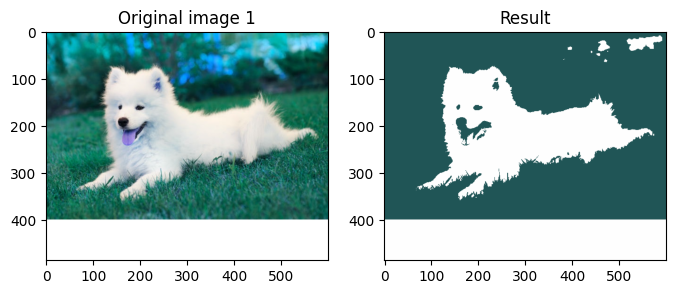

The Davies-Bouldin Index for the first picture is: 0.5823289146442823


In [5]:
# Number of Clusters
Num_Clus = 2

# Reading Images
img1 = cv2.imread('train1.jpg')
img_org1 = cv2.imread('train1.jpg')

# Generating Initial Weight Matrix Randomly
W1 = np.random.randint(0, 256, size=(3, Num_Clus))

# Printing Initial Weight Matrix
print('Initial coefficients for the image are:', W1)

# Training the Network for the First Image
W1 = train(img1, W1)

# Printing the Final Weight Matrix
print('Final coefficients for the image are:', W1)

# Performing Clustering
P1 = test(img1, W1)
img1 = Cluster(img1, P1, W1)

# Displaying the Final Results
plt.figure(1, figsize=(8, 8))
plt.subplot(2, 2, 1), plt.imshow(img_org1, cmap='gray'), plt.title('Original image 1')
plt.subplot(2, 2, 2), plt.imshow(img1, cmap='gray'), plt.title('Result')
plt.show()

# Calculating Davies-Bouldin Index
N1 = Num_in_clus(P1, W1)
S1 = Clus_scatt(img_org1, W1, P1, N1)
D1 = Clus_dis(W1)
R1 = Ration(S1, D1)
DBI1 = DBI(R1)  # For the first image

print('The Davies-Bouldin Index for the first picture is:', DBI1)